# Homework - Random Walks (18 pts)

## Continuous random walk in three dimensions

Write a program simulating a three-dimensional random walk in a continuous space. Let 1000 independent particles all start at random positions within a cube with corners at (0,0,0) and (1,1,1). At each time step each particle will move in a random direction by a random amount between -1 and 1 along each axis (x, y, z).

1. (3 pts) Create data structure(s) to store your simulated particle positions for each of 2000 time steps and initialize them with the particles starting positions.

In [5]:
import numpy as np

numTimeSteps = 2000
numParticles = 1000
dimensions = 3
particles = np.zeros((numParticles, dimensions, numTimeSteps))
particles[:,:,0] = np.random.rand(1000,3)



2. (3 pts) Write code to run your simulation for 2000 time steps.

In [6]:

for t in range(1, numTimeSteps):
    for p in range(numParticles):
        for d in range(dimensions):
            particles[p, d, t] = particles[p, d, t-1] + np.random.uniform(-1,1) 
    
print(particles)

[[[  0.40480874  -0.22434862   0.15875401 ...  -6.60561899  -6.61764811
    -6.57286905]
  [  0.60137949  -0.17636462  -0.48154051 ... -20.72215954 -21.64284162
   -22.45408236]
  [  0.80618963   1.66796943   2.1600364  ...  10.695211    10.81600528
    10.87649697]]

 [[  0.76956895   1.09550989   0.96188396 ...  -6.08719358  -5.40848588
    -4.44662545]
  [  0.52290411   0.41945188   0.55607298 ... -11.93877942 -11.67759147
   -11.45589916]
  [  0.93918106   1.85023194   2.2859862  ...  10.61866091  10.50815553
     9.80029122]]

 [[  0.74511075   1.4937413    2.43410421 ...   6.50216804   6.83786816
     6.86783282]
  [  0.62391034  -0.34421582   0.08703799 ... -38.23901861 -37.4270258
   -36.60703567]
  [  0.1104499    1.03676262   1.58484075 ...  40.25191828  40.8455432
    40.32228506]]

 ...

 [[  0.74273014   1.31159781   1.13092388 ... -15.67805097 -16.21771694
   -16.77232576]
  [  0.12365195   0.96957622   1.15918366 ...  18.30552726  17.54570713
    17.64121265]
  [  0.8575

3. (3 pts) Generate a series of four 3D scatter plots at selected time points to visually convey what is going on. Arrange the plots in a single row from left to right. Make sure you indicate which time points you are showing.

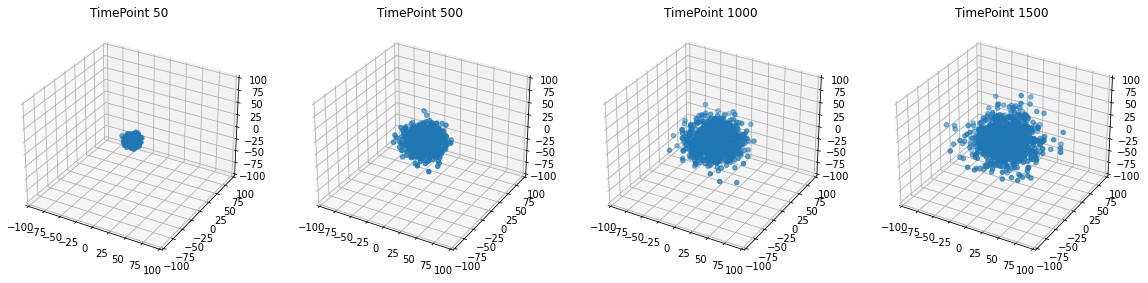

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

timePointA = particles[:,:,50]
timePointB = particles[:,:,500]
timePointC = particles[:,:,1000]
timePointD = particles[:,:,1500]



fig = plt.figure(figsize = (20,10))
figA = fig.add_subplot(1,4,1, projection = '3d')
figB = fig.add_subplot(1,4,2, projection = '3d')
figC = fig.add_subplot(1,4,3, projection = '3d')
figD = fig.add_subplot(1,4,4, projection = '3d')
figA.scatter(timePointA[:,0], timePointA[:,1], timePointA[:,2])
figA.set_xlim3d(-100, 100)
figA.set_ylim3d(-100, 100)
figA.set_zlim3d(-100, 100)
figA.title.set_text('TimePoint 50')


figB.scatter(timePointB[:,0], timePointB[:,1], timePointB[:,2])
figB.set_xlim3d(-100, 100)
figB.set_ylim3d(-100, 100)
figB.set_zlim3d(-100, 100)
figB.title.set_text('TimePoint 500')

figC.scatter(timePointC[:,0], timePointC[:,1], timePointC[:,2])
figC.set_xlim3d(-100, 100)
figC.set_ylim3d(-100, 100)
figC.set_zlim3d(-100, 100)
figC.title.set_text('TimePoint 1000')

figD.scatter(timePointD[:,0], timePointD[:,1], timePointD[:,2])
figD.set_xlim3d(-100, 100)
figD.set_ylim3d(-100, 100)
figD.set_zlim3d(-100, 100)
figD.title.set_text('TimePoint 1500')





# 4. (3 pts) Draw the path of a single particle (your choice) across all time steps in a 3D plot.

(3, 2000)


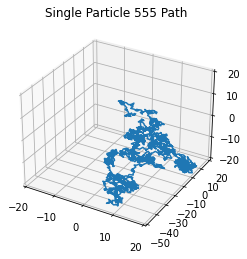

In [21]:
particle = particles[555, :, :]
print(particle.shape)
fig = plt.figure()
particlePath = fig.add_subplot(1,1,1, projection = '3d')
particlePath.set_xlim3d(-20, 20)
particlePath.set_ylim3d(-50, 20)
particlePath.set_zlim3d(-20, 20)
particlePath.plot3D(particle[0,:], particle[1,:], particle[2,:])
particlePath.title.set_text('Single Particle 555 Path')

5. (3 pts) Find the minimum, maximum, mean and variance for the jump distances of all particles throughout the entire simulation. Jump distance is the euclidean distance moved on each time step $\sqrt(dx^2+dy^2+dz^2)$. *Hint: numpy makes this very simple.*

In [22]:
prevs = particles[:,:,:-1]
posts = particles [:,:,1:]
offsets = posts - prevs 
jumpD = np.sqrt((offsets ** 2).sum(axis = 1))
minJD = np.min(jumpD)
maxJD = np.max(jumpD)
meanJD = np.mean(jumpD)
varJD = np.var(jumpD)
print(minJD, maxJD, meanJD, varJD)

0.008468790297175469 1.7274791422749733 0.9603432684445966 0.07728764175221985


6. (3 pts) Repeat the simulation, but this time confine the particles to a unit cell of dimension 10x10x10. Make it so that if a particle leaves one edge of the cell, it enters on the opposite edge (this is the sort of thing most molecular dynamics simulations do). Show plots as in #3 to visualize the simulation (note that most interesting stuff liekly happens in the first 100 time steps).

In [23]:
for t in range(1, numTimeSteps):
    for p in range(numParticles):
        for d in range(dimensions):
            particles[p, d, t] = (particles[p, d, t-1] + np.random.uniform(-1,1)) % 10
    
print(particles)

[[[0.40480874 9.86880221 9.95270501 ... 2.59131589 3.15802025 2.2285187 ]
  [0.60137949 0.93891725 1.53067596 ... 2.74089206 2.91040321 2.41627934]
  [0.80618963 9.89371643 9.73008444 ... 7.14321124 6.83944556 7.15977062]]

 [[0.76956895 1.2877759  1.54234535 ... 2.54127503 2.94007877 2.81971904]
  [0.52290411 0.24436534 0.92188673 ... 7.92879926 8.39192446 8.58833599]
  [0.93918106 1.42447643 1.07537995 ... 0.40955401 1.0753409  0.77677221]]

 [[0.74511075 0.52475997 0.30819701 ... 5.67227716 6.04255131 5.74717846]
  [0.62391034 1.04867816 1.90783104 ... 5.99040092 5.4983018  5.49578903]
  [0.1104499  9.98915144 9.16241459 ... 2.86398357 1.88953031 1.57471121]]

 ...

 [[0.74273014 1.35910977 2.15253432 ... 7.38439648 8.19744848 7.72923682]
  [0.12365195 0.32640783 0.13227217 ... 6.71474423 6.88672345 6.35042287]
  [0.8575691  9.9004387  9.5976328  ... 7.7255822  8.54864046 8.06812955]]

 [[0.21054859 9.58325364 9.84626598 ... 9.17831589 8.59981239 8.32619756]
  [0.36442257 0.44110267

(0.0, 10.0)

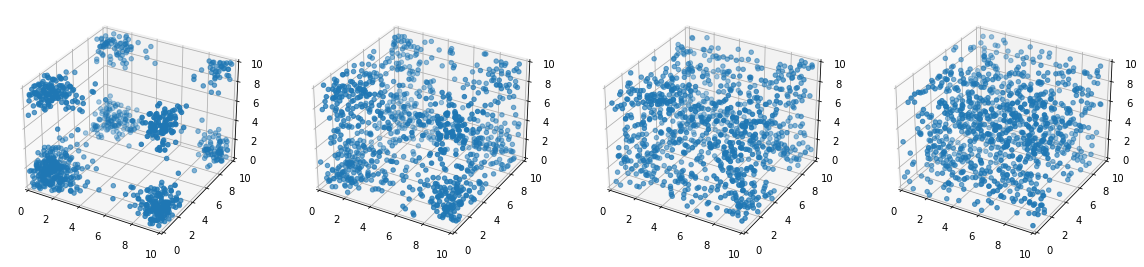

In [24]:

timePointA = particles[:,:,5]
timePointB = particles[:,:,15]
timePointC = particles[:,:,25]
timePointD = particles[:,:,40]



fig = plt.figure(figsize = (20,10))
figA = fig.add_subplot(1,4,1, projection = '3d')
figB = fig.add_subplot(1,4,2, projection = '3d')
figC = fig.add_subplot(1,4,3, projection = '3d')
figD = fig.add_subplot(1,4,4, projection = '3d')
figA.scatter(timePointA[:,0], timePointA[:,1], timePointA[:,2])
figA.set_xlim3d(0, 10)
figA.set_ylim3d(0, 10)
figA.set_zlim3d(0, 10)

figB.scatter(timePointB[:,0], timePointB[:,1], timePointB[:,2])
figB.set_xlim3d(0, 10)
figB.set_ylim3d(0, 10)
figB.set_zlim3d(0, 10)

figC.scatter(timePointC[:,0], timePointC[:,1], timePointC[:,2])
figC.set_xlim3d(0, 10)
figC.set_ylim3d(0, 10)
figC.set_zlim3d(0, 10)
figD.scatter(timePointD[:,0], timePointD[:,1], timePointD[:,2])
figD.set_xlim3d(0, 10)
figD.set_ylim3d(0, 10)
figD.set_zlim3d(0, 10)